In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_csv('T_L.csv')

In [5]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [6]:
data.dropna()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [7]:
data.isnull().any()

x    False
y     True
dtype: bool

In [9]:
data.shape

(700, 2)

In [10]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [11]:
data.fillna(49, inplace = True)

In [12]:
data.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.938527
std,134.681703,29.088409
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.986510
75%,75.000000,74.880631
max,3530.157369,108.871618


In [13]:
data.isnull().any()

x    False
y    False
dtype: bool

In [87]:
X = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])
X = X.reshape(-1,1)
y = y.reshape(-1,1)

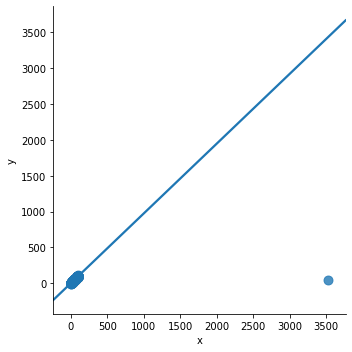

In [155]:
sns.lmplot(x = 'x', y = 'y', data = data, ci = None, robust = True, scatter_kws = {'s':80})

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [123]:
lm = LinearRegression()

In [124]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
pred = lm.predict(X_test)

In [126]:
mse = mean_squared_error(y_test,pred)

In [127]:
lm.coef_

array([[0.03258919]])

In [157]:
lm.intercept_

array([48.02938261])

In [128]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
print(r2_score(y_test,pred))

Mean squared error: 794.32
0.06292556455036113


In [129]:
y_test[0]

array([79.20610113])

In [130]:
pred[0]

array([50.47357207])

Text(0, 0.5, 'Predicted')

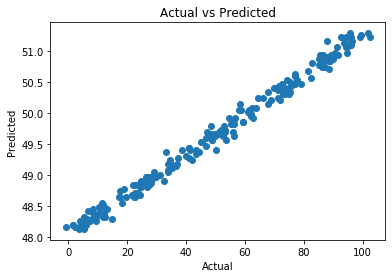

In [151]:
plt.scatter(x = y_test, y = pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(-2.575000000000003, 0.5, 'Predicted')

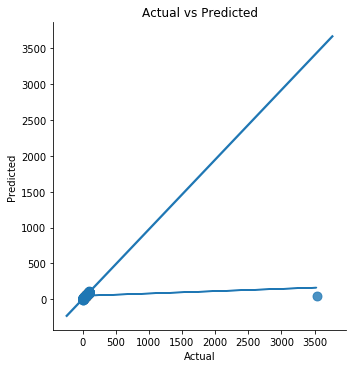

In [156]:
sns.lmplot(x = 'x', y = 'y', data = data, ci = None, robust = True, scatter_kws = {'s':80})
plt.plot(X_train, lm.predict(X_train))
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

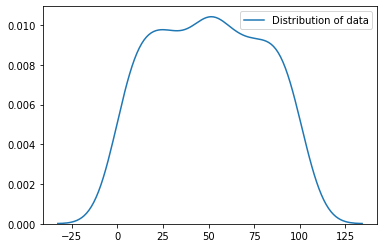

In [139]:
sns.distplot(y_test, bins = 10, hist= False, label = 'Distribution of data')

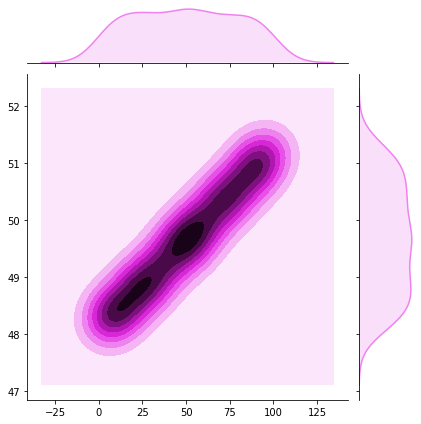

In [150]:
sns.jointplot(x= y_test, y=pred, kind="kde", color = 'violet')

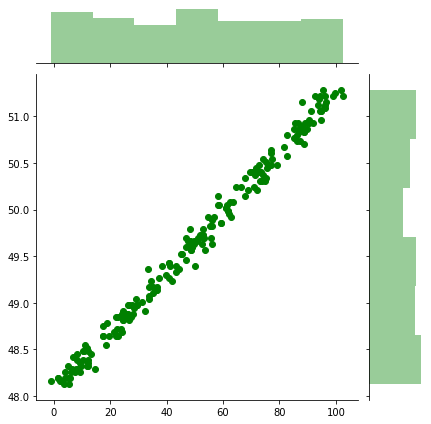

In [147]:
sns.jointplot(x= y_test, y=pred, kind="scatter", color = 'green')

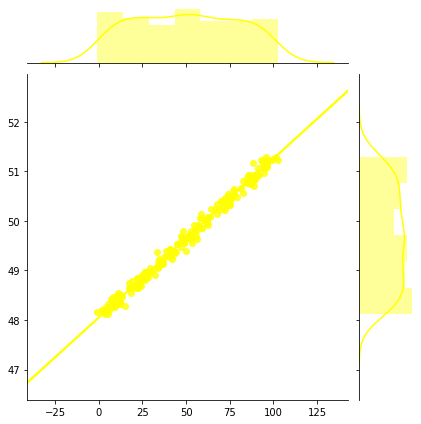

In [148]:
sns.jointplot(x= y_test, y=pred, kind="reg", color = "yellow")